<a href="https://colab.research.google.com/github/sergioberdiales/TFM_KSchool_Gijon_Air_Pollution/blob/master/21_Prediction_Models_ML_0_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing different machine learning models.  
Only auto regressive variables.  
PM10 / NO2  
h = 1  / 6  
train period: 201401-201612 and 201610-201612  
test period: 201701-201709  

In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We install and import pyreadr, in order to read rds objects.  
https://github.com/ofajardo/pyreadr



In [4]:
!pip install pyreadr
import pyreadr

    100% |████████████████████████████████| 184kB 6.6MB/s 


We upload the train and test data

In [105]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X_test_NO2_201701_201709.rds to X_test_NO2_201701_201709.rds
Saving X_test_NO2_20170101_20170114.rds to X_test_NO2_20170101_20170114.rds
Saving X_test_PM10_201701_201709.rds to X_test_PM10_201701_201709.rds
Saving X_test_PM10_20170101_20170114.rds to X_test_PM10_20170101_20170114.rds
Saving X_train_NO2_200901_201612.rds to X_train_NO2_200901_201612.rds
Saving X_train_NO2_201401_201612.rds to X_train_NO2_201401_201612.rds
Saving X_train_NO2_201610_201612.rds to X_train_NO2_201610_201612.rds
Saving X_train_PM10_200901_201612.rds to X_train_PM10_200901_201612.rds
Saving X_train_PM10_201401_201612.rds to X_train_PM10_201401_201612.rds
Saving X_train_PM10_201610_2016_12.rds to X_train_PM10_201610_2016_12.rds
Saving X_train_PM10_201610_201612.rds to X_train_PM10_201610_201612.rds
Saving X_validation_NO2_201710_201712.rds to X_validation_NO2_201710_201712.rds
Saving X_validation_PM10_201710_201712.rds to X_validation_PM10_201710_201712.rds
Saving y_test_NO2_201701_201709.rds to y_test_

In [71]:
!ls

sample_data			    X_validation_PM10_201710_201712.rds
X_test_NO2_20170101_20170114.rds    y_test_NO2_20170101_20170114.rds
X_test_NO2_201701_201709.rds	    y_test_NO2_201701_201709.rds
X_test_PM10_20170101_20170114.rds   y_test_PM10_20170101_20170114.rds
X_test_PM10_201701_201709.rds	    y_test_PM10_201701_201709.rds
X_train_NO2_201401_201612.rds	    y_train_NO2_201401_201612.rds
X_train_NO2_201610_201612.rds	    y_train_NO2_201610_201612.rds
X_train_PM10_201401_201612.rds	    y_train_PM10_201401_201612.rds
X_train_PM10_201610_2016_12.rds     y_train_PM10_201610_201612.rds
X_train_PM10_201610_201612.rds	    y_validation_NO2_201710_201712.rds
X_validation_NO2_201710_201712.rds  y_validation_PM10_201710_201712.rds


In [0]:
!rm *.*

We import the train and test data for the PM10 target.   
We start with the three month training dataset and the nine month testing dataset.

In [0]:
X_train = pyreadr.read_r("X_train_PM10_201610_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_201610_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]

In [0]:
#X_train = pd.read_csv("X_train_lite.csv")
#y_train = pd.read_csv("y_train_lite.csv")

#X_train = pd.read_csv("X_train_2014_2016.csv")
#y_train = pd.read_csv("y_train_2014_2016.csv")

#X_train = pd.read_csv("X_train_2009_2016.csv")
#y_train = pd.read_csv("y_train_2009_2016.csv")

#X_test = pd.read_csv("X_test_201701_201709.csv")
#y_test = pd.read_csv("y_test_201701_201709.csv")

#X_test = pd.read_csv("X_test.csv")
#y_test = pd.read_csv("y_test.csv")

In [94]:
X_train.head(10)

,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,...,PM10_24,PM10_25,PM10_26,PM10_27,PM10_48,PM10_72,PM10_96,PM10_120,PM10_144,PM10_168
0,19.0,9.0,14.0,11.0,20.0,16.0,15.0,12.0,11.0,15.0,...,9.0,8.0,6.0,8.0,12.0,18.0,28.0,4.0,9.0,22.0
1,18.0,19.0,9.0,14.0,11.0,20.0,16.0,15.0,12.0,11.0,...,11.0,9.0,8.0,6.0,11.0,25.0,25.0,14.0,2.0,13.0
2,16.0,18.0,19.0,9.0,14.0,11.0,20.0,16.0,15.0,12.0,...,6.0,11.0,9.0,8.0,12.0,18.0,24.0,13.0,3.0,5.0
3,12.0,16.0,18.0,19.0,9.0,14.0,11.0,20.0,16.0,15.0,...,8.0,6.0,11.0,9.0,8.0,12.0,20.0,12.0,8.0,5.0
4,13.0,12.0,16.0,18.0,19.0,9.0,14.0,11.0,20.0,16.0,...,6.0,8.0,6.0,11.0,11.0,14.0,25.0,8.0,6.0,8.0
5,9.0,13.0,12.0,16.0,18.0,19.0,9.0,14.0,11.0,20.0,...,6.0,6.0,8.0,6.0,8.0,16.0,14.0,7.0,7.0,6.0
6,14.0,9.0,13.0,12.0,16.0,18.0,19.0,9.0,14.0,11.0,...,4.0,6.0,6.0,8.0,13.0,11.0,10.0,2.0,5.0,9.0
7,11.0,14.0,9.0,13.0,12.0,16.0,18.0,19.0,9.0,14.0,...,10.0,4.0,6.0,6.0,14.0,15.0,15.0,11.0,11.0,5.0
8,10.0,11.0,14.0,9.0,13.0,12.0,16.0,18.0,19.0,9.0,...,11.0,10.0,4.0,6.0,29.0,8.0,25.0,10.0,8.0,5.0
9,12.0,10.0,11.0,14.0,9.0,13.0,12.0,16.0,18.0,19.0,...,14.0,11.0,10.0,4.0,19.0,15.0,27.0,13.0,4.0,11.0


In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 33 columns):
PM10_1      2041 non-null float64
PM10_2      2041 non-null float64
PM10_3      2041 non-null float64
PM10_4      2041 non-null float64
PM10_5      2041 non-null float64
PM10_6      2041 non-null float64
PM10_7      2041 non-null float64
PM10_8      2041 non-null float64
PM10_9      2041 non-null float64
PM10_10     2041 non-null float64
PM10_11     2041 non-null float64
PM10_12     2041 non-null float64
PM10_13     2041 non-null float64
PM10_14     2041 non-null float64
PM10_15     2041 non-null float64
PM10_16     2041 non-null float64
PM10_17     2041 non-null float64
PM10_18     2041 non-null float64
PM10_19     2041 non-null float64
PM10_20     2041 non-null float64
PM10_21     2041 non-null float64
PM10_22     2041 non-null float64
PM10_23     2041 non-null float64
PM10_24     2041 non-null float64
PM10_25     2041 non-null float64
PM10_26     2041 non-null float64
PM10_27  

In [96]:
y_train.head()

,PM10_0
0,18.0
1,16.0
2,12.0
3,13.0
4,9.0


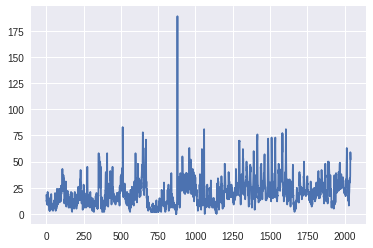

In [67]:
plt.plot(y_train["PM10_0"]);

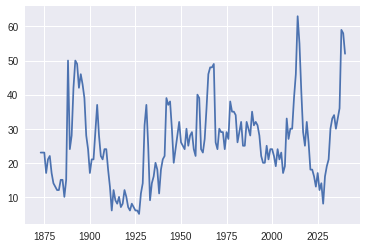

In [68]:
plt.plot(y_train["PM10_0"].iloc[-168:]);

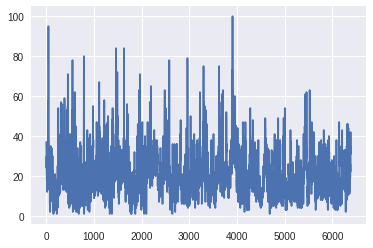

In [74]:
plt.plot(y_test["PM10_0"]);

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [97]:
regLR = LinearRegression()
regLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = regLR.predict(X_test)

AttributeError: ignored

In [99]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6383 entries, 0 to 6382
Data columns (total 1 columns):
PM10_0    6383 non-null float64
dtypes: float64(1)
memory usage: 49.9 KB


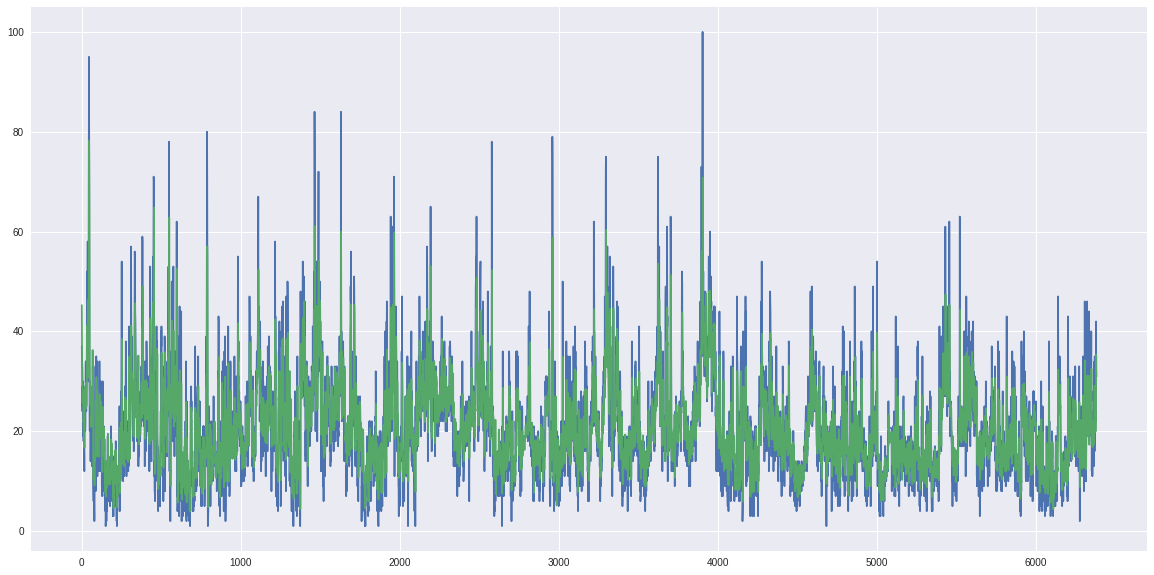

In [100]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [103]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(r2_score(y_test, y_pred)))
print("R^2 adjusted: {}".format(r2_adjusted))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_adjusted = 1 - (1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
#print(regLR.intercept_)
#print(regLR.coef_)


R^2: 0.581601909061324
R^2 adjusted: 0.5747224187768316
Mean Absolute Error: 4.935874244572473
Root Mean Squared Error: 6.953128067306267


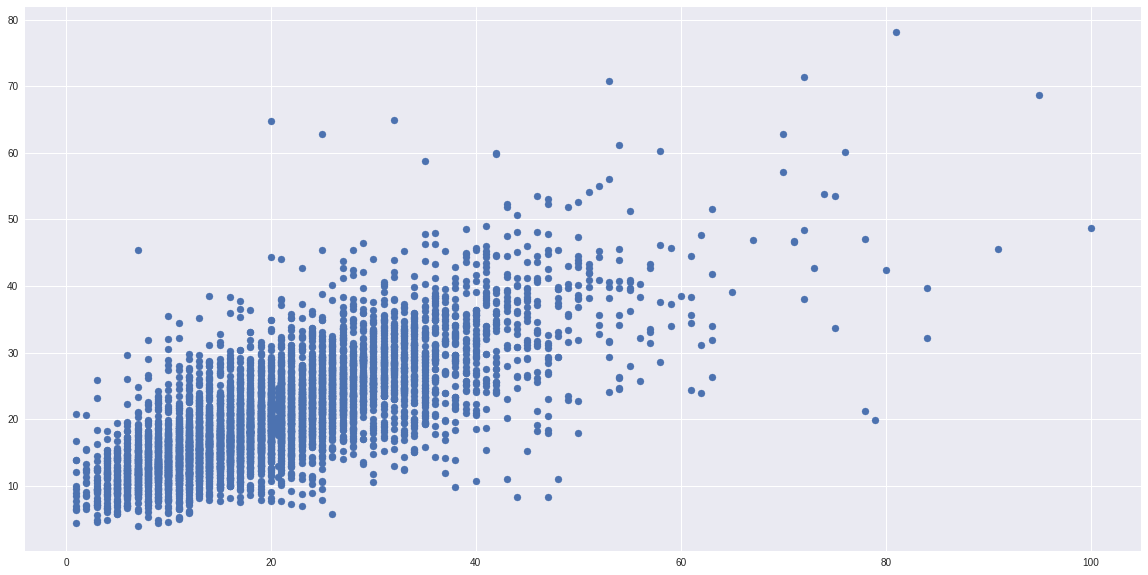

In [91]:

y_pred = y_pred.astype(float)
y_test = pd.DataFrame(y_test)
y_test = y_test.values
y_pred = pd.DataFrame(y_pred)
plt.figure(figsize=(20,10))
plt.scatter(x = y_test, y = y_pred)


In [0]:
#y_test.to_csv('y_test_1', encoding='utf-8', index=False)
#y_pred.to_csv('y_pred_1', encoding='utf-8', index=False)


train 2009-2016

In [106]:
X_train = pyreadr.read_r("X_train_PM10_200901_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_200901_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]

regLR = LinearRegression()
regLR.fit(X_train, y_train)

y_pred = regLR.predict(X_test)

# Compute and print R^2, R^2 adjuste, MAE and RMSE
print("R^2: {}".format(r2_score(y_test, y_pred)))
print("R^2 adjusted: {}".format(r2_adjusted))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_adjusted = 1 - (1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


R^2: 0.590168855355538
R^2 adjusted: 0.5747224187768316
Mean Absolute Error: 4.935874244572473
Root Mean Squared Error: 6.953128067306267


In [107]:
X_train = pyreadr.read_r("X_train_PM10_201401_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_201401_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]

regLR = LinearRegression()
regLR.fit(X_train, y_train)

y_pred = regLR.predict(X_test)

# Compute and print R^2, R^2 adjuste, MAE and RMSE
print("R^2: {}".format(r2_score(y_test, y_pred)))
print("R^2 adjusted: {}".format(r2_adjusted))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_adjusted = 1 - (1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


R^2: 0.5964598686543375
R^2 adjusted: 0.5899754447818848
Mean Absolute Error: 4.872723620628168
Root Mean Squared Error: 6.881575213769833


Hemos comprobado que para predecir los valores del primer mes de 2017 el dataset del ultimo trimestre de 2016 nos funciona bastante bien, aumentandolo a tres años mejora sólo un poquito la capacidad explicativa del modelo y aumentándolo más incluso empeoraría. De todas formas quizás estemos utilizando un dataset de test demasiado pequeño y cercano en el tiempo al dataset de train, con lo que podríamos estar obteniendo un modelo que sólo funcionase bien con el mes de enero por ejemplo. Para intentar evitar esto voy a utilizar un grupo de test mayor: los tres primeros trimestres de 2017, dejando el último trimestre sin tocar hasta el final para validación.



Lineal Regression results with train_lite (2016-10 - 2016-12) and only ar variables: 

R^2: 0.5840571289201126
Root Mean Squared Error: 6.951022748792432

Lineal Regression results with 3 years of training data (2014 - 2016) and only ar variables: 

R^2: 0.5964281362879187
Root Mean Squared Error: 6.846873552397199


Lineal Regression results with 8 years of training data (2009 - 2016) and only ar variables: 

R^2: 0.5931417871641943
Root Mean Squared Error: 6.874694613214001

Ampliando el grupo de test vemos como el R cuadrado se reduce ligeramente pero el RMSE se reduce bastante más. 



# Random Forest Regressor

In [114]:
X_train = pyreadr.read_r("X_train_PM10_201610_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_201610_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=350,min_samples_leaf=1,max_depth=4),
                   param_grid={"n_estimators":[100, 350, 500],
                              "min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_absolute_error")
regRFR.fit(X_train,y_train.values.ravel())
print(regRFR.best_params_)
print(regRFR.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 500}
-5.369194005373476
2.3171521325483737


In [122]:
X_train = pyreadr.read_r("X_train_PM10_201610_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_201610_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regRFR = RandomForestRegressor(n_estimators=350,min_samples_leaf=10,max_depth=5)
regRFR.fit(X_train,y_train.values.ravel())
                      
y_pred = regRFR.predict(X_test)

# Compute and print R^2, R^2 adjuste, MAE and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_adjusted = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R^2: {}".format(r2))
print("R^2 adjusted: {}".format(r2_adjusted))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.5768575750990581
R^2 adjusted: 0.5699000763338707
Mean Absolute Error: 4.899363278330239
Root Mean Squared Error: 6.9924386830381025


We increase the estimators to 1000.
And change the parameters options of min_samples_leaf and max_depth.

In [123]:
X_train = pyreadr.read_r("X_train_PM10_201610_201612.rds")
y_train = pyreadr.read_r("y_train_PM10_201610_201612.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=1000,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[5, 10],
                              "max_depth":range(5,15)},
                   scoring="neg_mean_absolute_error")
regRFR.fit(X_train,y_train.values.ravel())
print(regRFR.best_params_)
print(regRFR.best_score_)

y_pred = regRFR.predict(X_test)

# Compute and print R^2, R^2 adjuste, MAE and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_adjusted = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R^2: {}".format(r2))
print("R^2 adjusted: {}".format(r2_adjusted))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Squared Error: {}".format(rmse))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'min_samples_leaf': 10}
-5.375858525833417
R^2: 0.5766694076067007
R^2 adjusted: 0.5697088149066614
Mean Absolute Error: 4.9030816260319
Root Mean Squared Error: 6.9939932463862124


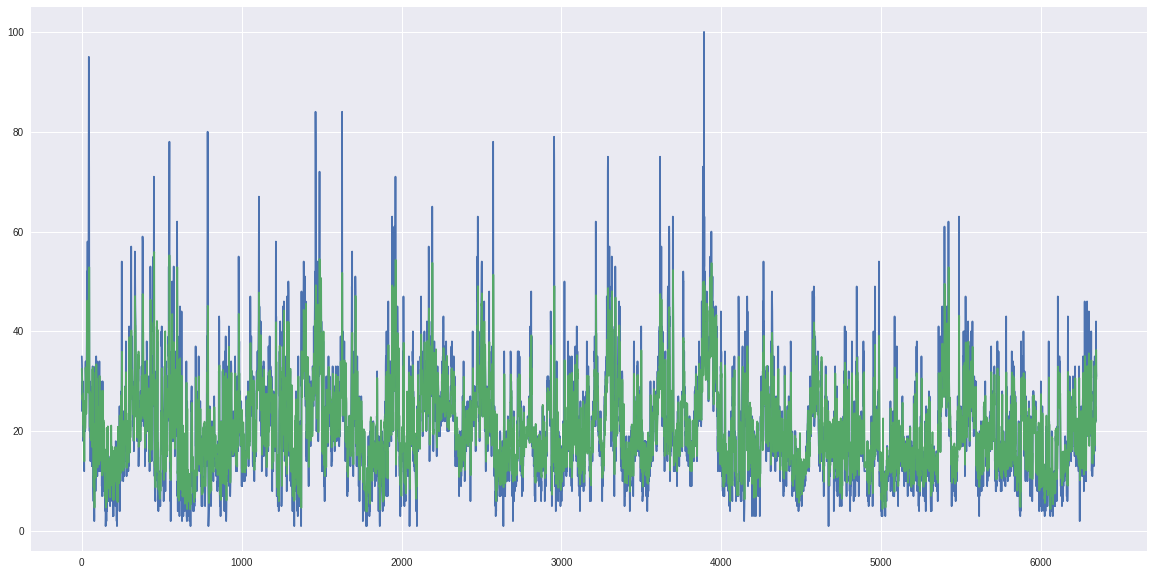

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))


R^2: -48.69522176015445
Root Mean Squared Error: 6.978196168076278


AttributeError: ignored

SyntaxError: ignored

Reduction of variables

Probamos  con las 6 primeras variables.

In [0]:
X_train = X_train[X_train.columns[0:4]]
X_test = X_test[X_test.columns[0:4]]

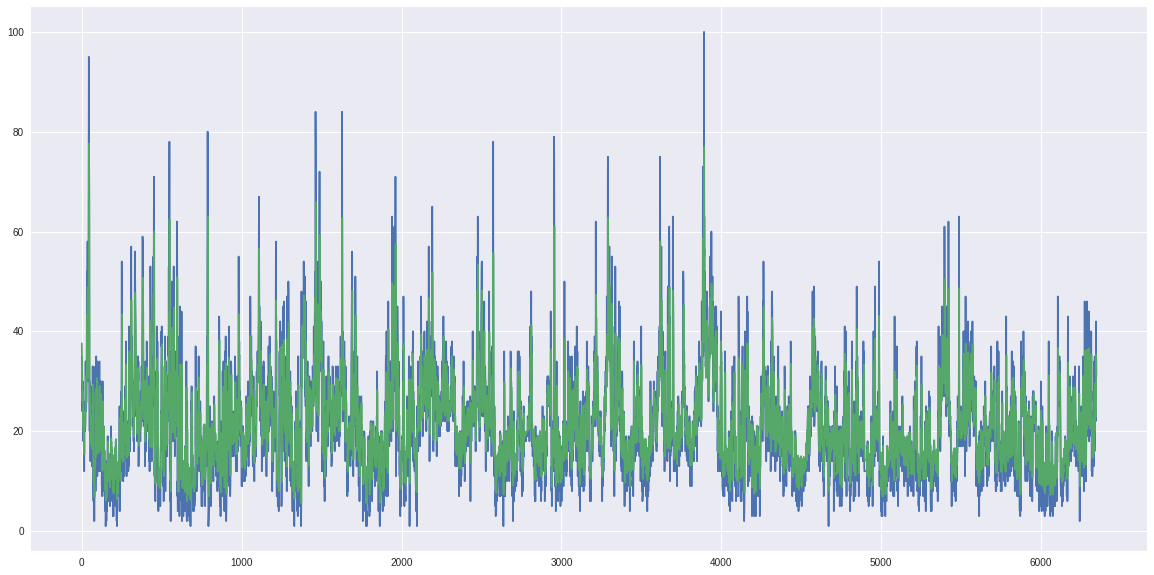

In [0]:
regLR = LinearRegression()
regLR.fit(X_train, y_train)
y_pred = regLR.predict(X_test)
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regLR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
print(regLR.intercept_)
print(regLR.coef_)

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]


Resultados regresion lineal con train 2014-2016 y solo las 6 primeras variables lagged

Apenas hay diferencias con el modelo de 30 variables.

R^2: 0.5889628398895992
Root Mean Squared Error: 6.909910311364052
[3.93467102]
[[0.59569712 0.13497708 0.03328157 0.02881637 0.0207577  0.02705815]]

Con solo las 4 primeras. Apenas se mueve. 

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]

Probamos a dejar solo las dos primeras. Es decir, los niveles de PM10 de las dos horas precedentes al valor que queremos predecir.

Las diferencias son muy pequeñas también. 

R^2: 0.5825291214207613
Root Mean Squared Error: 6.963778681133049
[4.78661913]
[[0.61635125 0.18972618]]

Si hacemos un modelo con una única variable, el valor de la hora precedente casi obtenemos un R cuadrado de 57%

R^2: 0.5693274409714437
Root Mean Squared Error: 7.073029471241542
[5.90722781]
[[0.76068138]]



En principio, viendo lo poco que aportan el resto de variables, voy a quedarme con sólo las 4 primeras. Tendré un modelo que en principio explica un menos de la variabilidad y con un error un poco mayor, pero mucho menos complejo, lo que me dará agilidad a la hora de procesar e ir probando la introducción de otras variables.

KNeighbors Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor
regKN = KNeighborsRegressor(n_neighbors=5)
from sklearn.model_selection import cross_val_score

In [0]:
regKN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [0]:
y_pred = regKN.predict(X_test)

In [0]:
# MAE
cross_val_score(regKN,X_train,y_train,scoring="neg_mean_absolute_error").mean()

-6.938626222661831

In [0]:
# RMSE
np.sqrt(-cross_val_score(regKN,X_train,y_train,scoring="neg_mean_squared_error").mean())

9.998242656152394

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regKN.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.41119432400473
Root Mean Squared Error: 9.935828886015193


In [0]:
!ls

gdrive	sample_data  X_test.csv  X_train_lite.csv  y_test.csv  y_train_lite.csv


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
regGS = GridSearchCV(KNeighborsRegressor(n_neighbors=1),
                   param_grid={"n_neighbors":range(1,50)},
                   scoring="neg_mean_squared_error")

In [0]:
regGS.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
np.sqrt(-regGS.best_score_)

9.61452092990897

In [0]:
regGS.best_params_

{'n_neighbors': 18}

In [0]:
y_pred = regGS.predict(X_test)

In [0]:
y_pred = pd.DataFrame(y_pred)

In [0]:
y_pred.head()

,0
0,39.722222
1,32.777778
2,30.611111
3,27.055556
4,24.000000


In [0]:

y_pred = y_pred.rename(columns={"0": "pm10_0"})


In [0]:
y_pred.columns = ['pm10_0']
y_pred = y_pred.astype(float)

In [0]:
y_pred.info()
y_pred.shape

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 9.0+ KB


(575, 1)

In [0]:
y_test = y_test.astype(float)
y_test.info()
y_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 4.6 KB


(575, 1)

In [0]:
print("R^2: {}".format(regGS.score(y_test, y_pred)))

ValueError: ignored

In [0]:
regGS.score(X_test, y_test)

-95.49161567364465

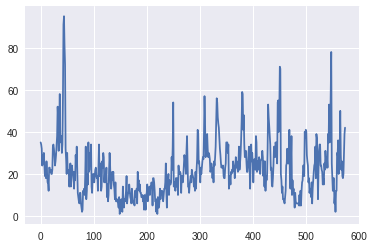

In [0]:
plot(y_test)

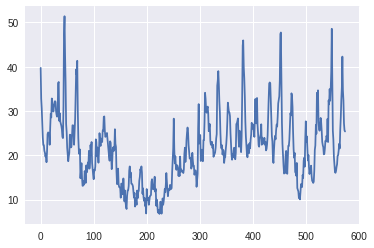

In [0]:
plot(y_pred)

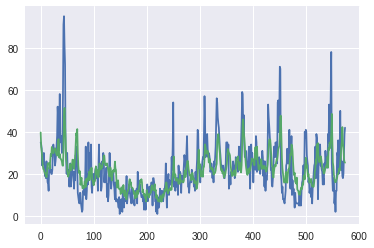

In [0]:
plot(y_test)
plot(y_pred)

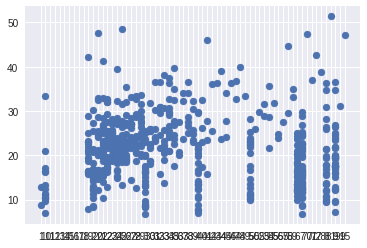

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regRFR.fit(X_train,y_train)
print(regRFR.best_params_)
print(regRFR.best_score_)
print(np.sqrt(-regRFR.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 5, 'min_samples_leaf': 10}
-71.22191115678358
8.439307504575455


In [0]:
y_pred = regRFR.predict(X_test)

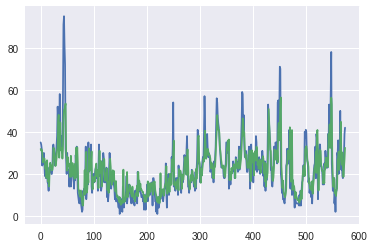

In [0]:
plot(y_test)
plot(y_pred)

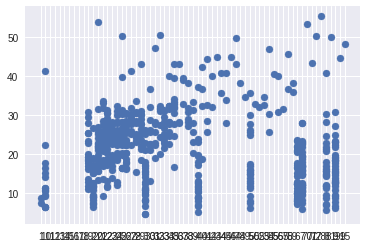

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -68.48079844564434
Root Mean Squared Error: 8.27531258899894


In [0]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

68.43043306104964
Root Mean Squared Error: 8.272268918564581


Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
regLR = GridSearchCV(LinearRegression(),
                   param_grid={},
                   scoring="neg_mean_squared_error")
regLR.fit(X_train,y_train)

print(regLR.best_params_)
print(regLR.best_score_)
print(np.sqrt(-regLR.best_score_))

{}
-80.78990942218464
8.988320723148714


XGBoost

In [0]:
from xgboost import XGBRegressor
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
regXGB = GridSearchCV(XGBRegressor(n_estimators=100, min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regXGB.fit(X_train,y_train)

print(regXGB.best_params_)
print(regXGB.best_score_)
print(np.sqrt(-regXGB.best_score_))
print(mean_absolute_error(y_test, y_pred))







{'max_depth': 2, 'min_samples_leaf': 10}
-71.49523980790217
8.455485781899355


NameError: ignored

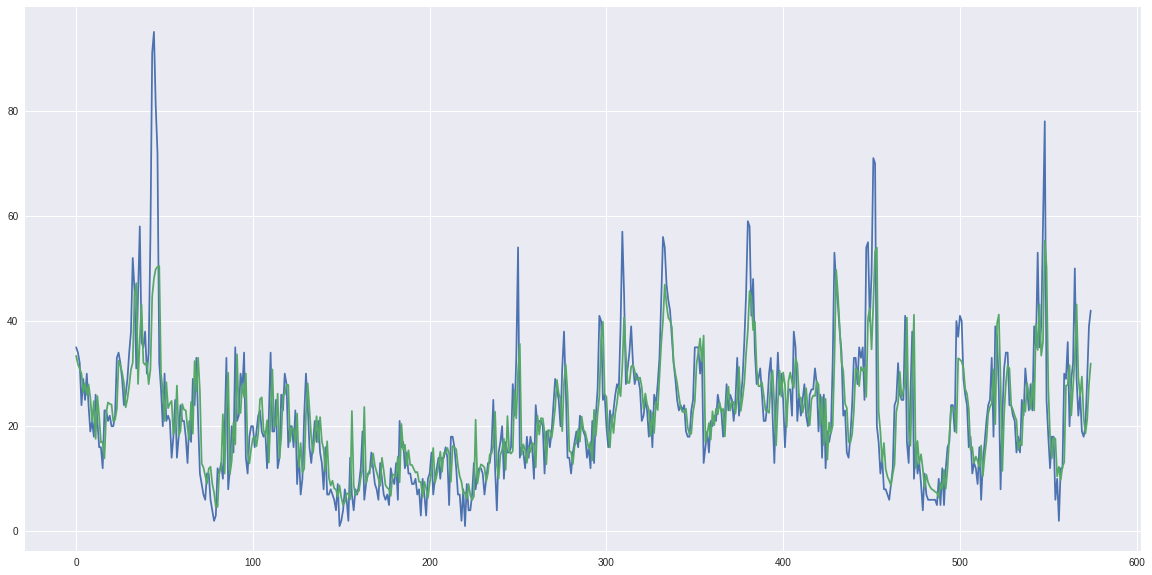

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)